In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../libs")
from vvv_utils import parse_metadata, parse_light_curve_data, plot_light_curve, get_train_test_ids

### Parse metadata

88454 light curve metadata collected


,P1,P2,P_ogle,label
ID_VVV,,,,
b395_201_28153,0.316792,0.633585,0.316787,rrlyrae
b395_205_6265,0.287350,0.574699,0.287350,rrlyrae
b395_304_9934,0.355847,0.711693,0.355842,rrlyrae
b396_209_39823,0.814810,0.407405,0.407412,rrlyrae
b396_410_32500,0.313249,0.626496,0.313247,rrlyrae


<IPython.core.display.Javascript object>


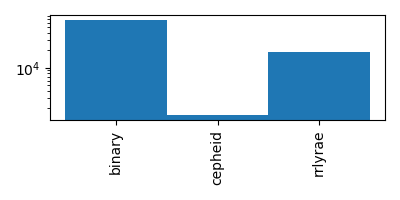

In [4]:
df_meta = parse_metadata(experiment="ALL", merge_subclasses=True)
class_names = df_meta["label"].unique()
display(df_meta.tail(5))

fig, ax = plt.subplots(figsize=(4, 2), tight_layout=True)
ax.hist(df_meta["label"], bins= np.arange(0, len(class_names) + 0.5) - 0.5);
ax.set_yscale('log')
ax.set_xticklabels(class_names, rotation='vertical');

### Plotear a given light curve

<IPython.core.display.Javascript object>


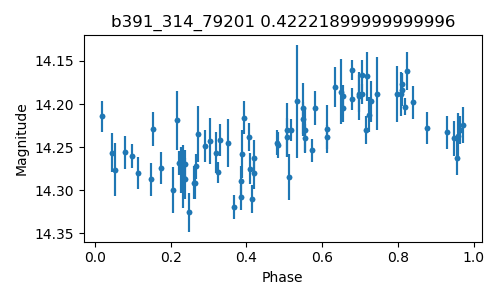

<IPython.core.display.Javascript object>


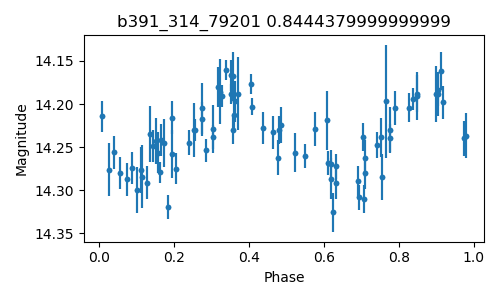

<IPython.core.display.Javascript object>


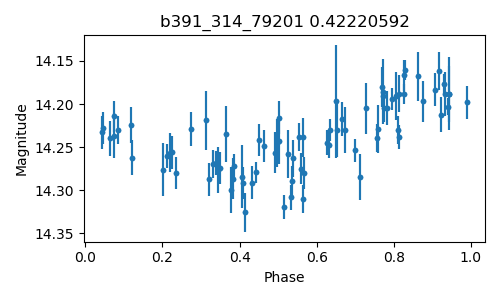

In [5]:
meta_lc = df_meta.loc["b391_314_79201"]

lc_df = parse_light_curve_data(meta_lc.name)
plot_light_curve(lc_df, period=meta_lc["P1"])
plot_light_curve(lc_df, period=meta_lc["P2"])
plot_light_curve(lc_df, period=meta_lc["P_ogle"])

In [14]:
period = df_meta["P_ogle"]

for index, row in df_meta.iterrows():
    #display(row)
    #break
    lc_data = parse_light_curve_data(row.name)
    lc_data["phase"] = np.mod(lc_data["mjd"], row.P_ogle)/row.P_ogle
    display(lc_data)
    #normalize
    mag_std = lc_data["mag"].std()
    lc_data["mjd"] = lc_data["mjd"]-lc_data["mjd"].min()
    lc_data["mag"] = (lc_data["mag"]-lc_data["mag"].mean())/mag_std
    lc_data["err"] = lc_data["err"]/mag_std
    lc_data.sort_values(by="phase", inplace=True)
    # ajustar todas a largo MAXIMO, rellenando con 0s las que sean mas pequeñas,
    # asignando un label '1' si es dato real y '0' si es dato rellenado.
    #if len(lc_data) == MAXIMO:
    #    lc_data["mask"] = 1
    #else:
    #    while len(lc_data) < 335:
    #        #RELLENAR con 0s;
    #        lc_data = lc_data.append(df_zeros, ignore_index=True,sort=False)
    #lc_data = lc_data.fillna(1)
    #lc_data = lc_data[["phase","mag","err","mjd","mask"]]
    self.data.append(torch.from_numpy(rrl_data.values.astype('float32')))
    display(lc_data)
    break

,mjd,mag,err,phase
b221_201_22183,55307.363782,13.0033,0.0138,0.728555
b221_201_22183,55426.218367,13.0035,0.0093,0.235795
b221_201_22183,55498.998511,12.9304,0.0137,0.445171
b221_201_22183,55499.996799,12.9931,0.0166,0.516625
b221_201_22183,55816.110468,13.0297,0.0119,0.143055
...,...,...,...,...
b221_201_22183,57175.278457,12.9037,0.0124,0.428060
b221_201_22183,57246.014579,12.9722,0.0099,0.491131
b221_201_22183,57249.002266,13.0379,0.0105,0.704980
b221_201_22183,57252.213808,12.9338,0.0095,0.934852


,mjd,mag,err,phase
b221_201_22183,1443.033172,0.439579,0.390831,0.016367
b221_201_22183,1065.958886,0.468177,0.230686,0.026566
b221_201_22183,1247.715996,0.479616,0.179210,0.036173
b221_201_22183,1234.801461,1.840851,0.186836,0.111791
b221_201_22183,829.665987,1.543438,0.291693,0.113458
...,...,...,...,...
b221_201_22183,868.771280,-1.190472,0.118203,0.912493
b221_201_22183,1944.850026,-0.671906,0.181117,0.934852
b221_201_22183,1442.042560,-0.793921,0.335543,0.945462
b221_201_22183,1176.816781,-0.582301,0.478530,0.961429


### Split dataset into train and test set using Stratified Shuffle Split

In [6]:
train_idx, test_idx = get_train_test_ids(df_meta)

from collections import Counter

display(Counter(list(df_meta.loc[train_idx]["label"])))
display(Counter(list(df_meta.loc[test_idx]["label"])))

Counter({'cepheid': 1346, 'binary': 61096, 'rrlyrae': 17178})

Counter({'binary': 6790, 'rrlyrae': 1909, 'cepheid': 149})